# 5340 Fall 2023
# Notebook 3

# Part III: Graphs, Laplacians, and Markov Chains


1. Create a function `DirichletLaplace` that takes as input a float `h` ($h>0$) and a function `f_dom` and returns two things: (i) a list of 2D vectors `x` ($x = [x_1,...x_N]$) (ii) A number `N0` (ii) A $N\times N$ matrix `L_D`. The list of 2D vectors is characterized by $$ \{x_1,\ldots,x_N \} = \Omega_{f_{dom}} \cap (h\mathbb{Z}^2),\;\;\Omega_{f_{dom}} := \{ x \in \mathbb{R}^2 \mid f_{dom}(x)<0 \}$$ while the matrix $L$ must be defined so that $L_{ij} = 1/(4h^2)$ if $x_i$ and $x_j$ are neighbors in $h\mathbb{Z}^2$, $L_{ii} = -1/h^2$ for every $i$, and $L_{ij} = 0$ for all other $(i,j)$.
2. Use `scipy.linalg.eig` to compute the first 3 eigenvalues of $L$ where $L$ is the output from `DirichletLaplace` for the following two sets of inputs: (1) $f_{dom}(x_1,x_2) = x_1^2+x_2^2-R^2$ for $R=1,2,3$ and $h=0.020$ and $h=0.05$ and $h = 0.01$. (2) $f_{dom}$ is a function which takes the values $-1$ and $1$ respectively inside and outside the triangle with corners $(0,0),(1,0),(0,1)$ and the one with corners $(0,0),(\cos(2\pi/3),\sin(2\pi/3)),(\cos(4\pi/3),\sin(4\pi/3))$ 
3.Let $G$ be the graph obtained by intersecting the grid $L^*\mathbb{Z}^2$ with the unit square $[-1,1]^2$, let $f:G\to \mathbb{R}$ be the characteristic function of the square $[-r,r]^2$, so $f(x_i) = 1$ if $x_i \in G \cap [-r,r]^2$ and $0$ otherwise. Use `scipy.integrate` to compute the numerical solution for the heat equation in $G$ with this initial data when $h=0.01$ and $r=0.5$, using a time step of $h=0.01$. Use `matplotlib.animate` to plot the solution by plotting the points of $G$ with a color according to the value of the solution.
4.Suppose $u=u(x,y)$ is a function defined for $(x,y)$ in a domain $\Omega \subset \mathbb{R}^2$ which is bounded and with smooth boundary. Given $h>0$, define $$L_hu(x,y) := \frac{u(x+h,y)+u(x-h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{4h^2}$$ Show that (1) $L_hu$ converges pointwise as $h\to 0^+$, and describe the limit. (2) (_Optional_) Suppose that in addition, $\Delta u(x,y) = 0$ for every $(x,y) \in \Omega$, then in this case show that $h^{-1}L_hu(x,y)$ also has a limit as $h\to 0$, and describe the limit. (3) (_Optional_) Show in addition to part (1) that the convergence of $L_hu$ as $h\to 0$ occurs uniformly in compact subsets of $\Omega$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as stats
import networkx as nx

In [2]:
def GenerateRandomGraph(n = 100, k = 4, sigma1 = 10, sigma2 = 1, r = 0.25):
    centers = stats.multivariate_normal.rvs(mean = [0,0], cov = sigma1*np.eye(2), size = k )
    x = {}
    for i in range(0,k):
        for j in range(0,n):
            x[i*n+j] = stats.multivariate_normal.rvs(mean = centers[i], cov = sigma2*np.eye(2))
    M = np.zeros((n*k,n*k))
    for i in range(n*k):
        for j in range(n*k):
            if i != j and la.norm(x[i]-x[j]) < r:
                M[i,j] = 1
    return x, M

In [7]:
x, M = GenerateRandomGraph(n= 50, k = 6, sigma1=2, sigma2 = 2, r= 0.6)

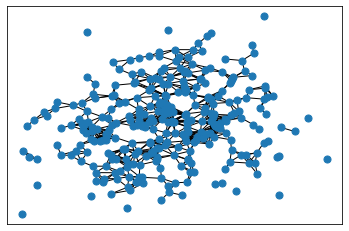

In [8]:
G = nx.from_numpy_matrix(M)
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 50)
plt.draw()

In [31]:
d = 0.0

P = M
for i in range(len(M[0])):
    d = P[i].sum()
    if d == 0:
        P[i] = np.zeros(len(M[0]))
        P[i,i] = 1
    else:
        for j in range(len(M[0])):
            P[i,j] = P[i,j]/d

P_1 = P        
for k in range(500):
    P = P @ P_1

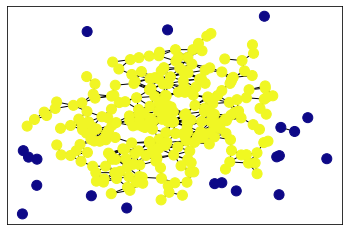

In [32]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[0], cmap = 'plasma')
plt.draw()

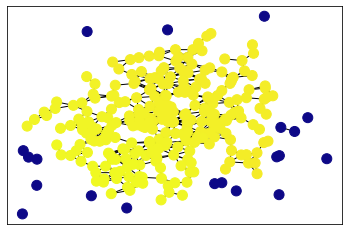

In [33]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[15], cmap = 'plasma')
plt.draw()

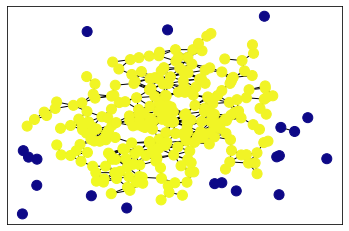

In [34]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[20], cmap = 'plasma')
plt.draw()

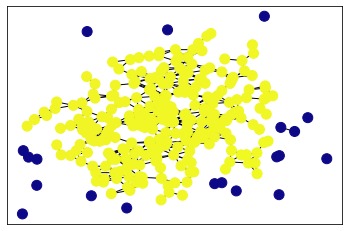

In [35]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[30], cmap = 'plasma')
plt.draw()

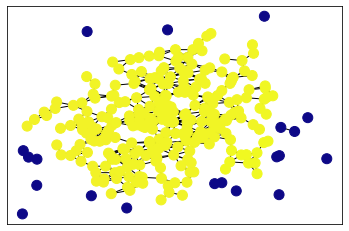

In [36]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[40], cmap = 'plasma')
plt.draw()

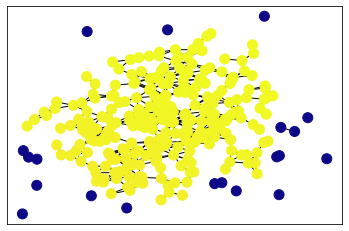

In [37]:
nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = P.T[150], cmap = 'plasma')
plt.draw()